# Primera Parte: Carga de Datos

In [92]:
import pandas as pd

In [93]:
# En esta parte se carga la Data y se visualiza la cantidad de campos que se tiene en la data.
Uni=pd.read_csv('qs-world-university-rankings-2017-to-2022-V2.csv')
Uni.head()
Uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int64  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   logo                    6482 non-null   object 
 9   type                    6470 non-null   object 
 10  research_output         6480 non-null   object 
 11  student_faculty_ratio   6407 non-null   float64
 12  international_students  6318 non-null   object 
 13  size                    6480 non-null   object 
 14  faculty_count           6404 non-null   

# Segunda Parte: Limpieza de Datos

In [94]:
#Seleccionando los campos con los que se va a trabajar.
Uni=Uni[['research_output','international_students','type','score',]]

In [95]:
#ver el numero de registros null.
Uni.isna().sum()

research_output              2
international_students     164
type                        12
score                     3662
dtype: int64

In [96]:
Uni

,research_output,international_students,type,score
0,Very High,"3,730",Private,100.0
1,Very High,"3,879",Private,98.7
2,Very High,"5,877",Private,98.3
3,Very high,"7,925",Public,97.2
4,Very High,692,Private,96.9
...,...,...,...,...
6477,High,57,Public,NaN
6478,Very High,585,Public,NaN
6479,Medium,"2,826",Public,NaN
6480,High,"2,394",Public,NaN


In [97]:
#Llenando los campos nulos con la media del campo score.
Uni['score'] = Uni['score'].fillna(Uni['score'].mean())
Uni.isna().sum()

research_output             2
international_students    164
type                       12
score                       0
dtype: int64

In [98]:
#llenando de el tipo de universidad con private o public. 
import random as rd
tipos=['private','public']
def filltype(tipo):
 i=rd.randint(0,1) # rango de 0 a 1
 tipo=tipos[i]
 return tipo
Uni['type'] = Uni['type'].fillna(Uni['type'].apply(filltype))

In [99]:
Uni

,research_output,international_students,type,score
0,Very High,"3,730",Private,100.000000
1,Very High,"3,879",Private,98.700000
2,Very High,"5,877",Private,98.300000
3,Very high,"7,925",Public,97.200000
4,Very High,692,Private,96.900000
...,...,...,...,...
6477,High,57,Public,46.595532
6478,Very High,585,Public,46.595532
6479,Medium,"2,826",Public,46.595532
6480,High,"2,394",Public,46.595532


In [100]:
Uni.isna().sum()

research_output             2
international_students    164
type                        0
score                       0
dtype: int64

In [101]:
quality=['very high','medium','high','low']
def fillquality(tipo):
 i=rd.randint(0,3)
 tipo=quality[i]
 return tipo
Uni['research_output'] = Uni['research_output'].fillna(Uni['research_output'].apply(fillquality))

In [102]:
Uni.isna().sum()
#estandarizando los datos "reasearch_output y type" a minuscula
Uni['research_output']=Uni['research_output'].str.lower()
Uni['type'] = Uni['type'].str.lower()

In [103]:
Uni.head(20)

,research_output,international_students,type,score
0,very high,"3,730",private,100.0
1,very high,"3,879",private,98.7
2,very high,"5,877",private,98.3
3,very high,"7,925",public,97.2
4,very high,692,private,96.9
5,very high,"8,442",public,96.8
6,very high,"21,824",public,95.6
7,very high,"7,733",public,94.2
8,very high,"11,143",public,94.1
9,very high,"4,696",private,93.0


In [104]:
import re
#Limpiando los puntos y comas del campo international_students
Uni['international_students']=Uni['international_students'].str.replace(re.compile('[\.,]'),'')

In [105]:
#llenado del campo international_students con valores de rango [1000-25000]
def fillstudents(tipo):
 i=rd.randint(1000,25000)
 return str(i)
Uni['international_students']= Uni['international_students'].fillna(Uni['international_students'].apply(fillstudents))

In [106]:
#visualizacon de los campos a utilizar
Uni.isna().sum()

research_output           0
international_students    0
type                      0
score                     0
dtype: int64

In [107]:
#comvercion del campo international_students  de string a int
Uni['international_students']=Uni['international_students'].astype(int)
Uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   research_output         6482 non-null   object 
 1   international_students  6482 non-null   int32  
 2   type                    6482 non-null   object 
 3   score                   6482 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 177.4+ KB


# Tercera Parte: Normalizacion de Datos

In [108]:
trainDatax = Uni[['research_output','international_students','type']].copy()
trainDatay = Uni[['score']].copy()
print(trainDatay.head(),"\n", trainDatax.head())

   score
0  100.0
1   98.7
2   98.3
3   97.2
4   96.9 
   research_output  international_students     type
0       very high                    3730  private
1       very high                    3879  private
2       very high                    5877  private
3       very high                    7925   public
4       very high                     692  private


In [109]:
trainDatax['type'], categoryType = trainDatax['type'].factorize(sort=True)
categoryType

Index(['private', 'public'], dtype='object')

In [110]:
trainDatax.type

0       0
1       0
2       0
3       1
4       0
       ..
6477    1
6478    1
6479    1
6480    1
6481    1
Name: type, Length: 6482, dtype: int64

In [111]:
trainDatax['research_output'], categoryReasearch = trainDatax['research_output'].factorize(sort = True)
categoryResearch

Int64Index([0, 1, 2, 3], dtype='int64')

In [112]:
trainDatax.head()

,research_output,international_students,type
0,3,3730,0
1,3,3879,0
2,3,5877,0
3,3,7925,1
4,3,692,0


In [113]:
# Etiquetando el campo score en intervalos
pd.cut(trainDatay['score'],10,retbins = True)

(0       (92.35, 100.0]
 1       (92.35, 100.0]
 2       (92.35, 100.0]
 3       (92.35, 100.0]
 4       (92.35, 100.0]
              ...      
 6477     (46.45, 54.1]
 6478     (46.45, 54.1]
 6479     (46.45, 54.1]
 6480     (46.45, 54.1]
 6481     (46.45, 54.1]
 Name: score, Length: 6482, dtype: category
 Categories (10, interval[float64, right]): [(23.424, 31.15] < (31.15, 38.8] < (38.8, 46.45] < (46.45, 54.1] ... (69.4, 77.05] < (77.05, 84.7] < (84.7, 92.35] < (92.35, 100.0]],
 array([ 23.4235,  31.15  ,  38.8   ,  46.45  ,  54.1   ,  61.75  ,
         69.4   ,  77.05  ,  84.7   ,  92.35  , 100.    ]))

In [114]:
trainDatay['score'] = pd.cut(trainDatay.score, [20,30,40,50,60,70,80,90,100])

In [115]:
trainDatay.iloc[0:100:15]

,score
0,"(90, 100]"
15,"(90, 100]"
30,"(80, 90]"
45,"(70, 80]"
60,"(70, 80]"
75,"(60, 70]"
90,"(60, 70]"


In [116]:
# Categorizando el campo score
trainDatay['score'], categoryScore = trainDatay['score'].factorize(sort = True)
categoryScore

CategoricalIndex([(20, 30], (30, 40], (40, 50], (50, 60], (60, 70], (70, 80],
                  (80, 90], (90, 100]],
                 categories=[(20, 30], (30, 40], (40, 50], (50, 60], (60, 70], (70, 80], (80, 90], (90, 100]], ordered=True, dtype='category')

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()
scaler.fit(trainDatax)
print(scaler.mean_)

[2.26118482e+00 3.26436331e+03 8.15797593e-01]


In [119]:
trainDatax = scaler.fit_transform(trainDatax)
trainDatax

array([[ 0.59822167,  0.11786861, -2.10447398],
       [ 0.59822167,  0.15558562, -2.10447398],
       [ 0.59822167,  0.66134791, -2.10447398],
       ...,
       [-0.21148241, -0.11096478,  0.47517813],
       [-1.83089058, -0.22031879,  0.47517813],
       [-1.83089058, -0.24411341,  0.47517813]])

In [120]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(trainDatax)
print(pca.explained_variance_ratio_)  

[0.41887777 0.29793198 0.28319025]


In [121]:
print(trainDatax, trainDatay)

[[ 0.59822167  0.11786861 -2.10447398]
 [ 0.59822167  0.15558562 -2.10447398]
 [ 0.59822167  0.66134791 -2.10447398]
 ...
 [-0.21148241 -0.11096478  0.47517813]
 [-1.83089058 -0.22031879  0.47517813]
 [-1.83089058 -0.24411341  0.47517813]]       score
0         7
1         7
2         7
3         7
4         7
...     ...
6477      2
6478      2
6479      2
6480      2
6481      2

[6482 rows x 1 columns]


In [122]:
# Entrenar la RN
import numpy as np
from sklearn.model_selection import train_test_split

In [123]:
trainDatay=trainDatay.to_numpy()
x_train, x_test, y_train, y_test= train_test_split(trainDatax, trainDatay, test_size=0.3)

In [124]:
print(x_train[0:5], x_test[0:5], y_train[0:5], y_test[0:5])

[[ 0.59822167  2.33203417  0.47517813]
 [ 0.59822167 -0.20842148  0.47517813]
 [ 0.59822167 -0.57571932  0.47517813]
 [ 0.59822167 -0.36637727  0.47517813]
 [ 0.59822167 -0.13931582  0.47517813]] [[-1.83089058 -0.65646916  0.47517813]
 [ 0.59822167  0.24418261  0.47517813]
 [-1.83089058 -0.49674143 -2.10447398]
 [ 0.59822167 -0.09096717  0.47517813]
 [ 0.59822167 -0.61925842  0.47517813]] [[3]
 [2]
 [2]
 [2]
 [2]] [[2]
 [6]
 [0]
 [2]
 [0]]


In [125]:
#import numpy as np

def sigmoide(x):
  return (1.0/(1.0+np.exp(-x)))
def derivada(x):
  return sigmoide(x)*(1.0-sigmoide(x))

def neurona(entrada, pesosCO1, tendenciasC01, pesosCO2, tendenciasCO2, pesosCO3, tendenciasCO3, pesosCS, tendenciasCS):
  entradaNetaC1=np.dot(pesosCO1, np.transpose(entrada))-tendenciasC01
  salidaC1=sigmoide(entradaNetaC1)

  entradaNetaC2 = np.dot(pesosCO2,salidaC1)-tendenciasCO2
  salidaC2=sigmoide(entradaNetaC2)

  entradaNetaC3 = np.dot(pesosCO3,salidaC2)-tendenciasCO3
  salidaC3=sigmoide(entradaNetaC3)

  entradaNetaCS = np.dot(pesosCS,salidaC3)-tendenciasCS
  salida=sigmoide(entradaNetaCS)

  return salida, entradaNetaCS, entradaNetaC3, entradaNetaC2, entradaNetaC1
# el algoritmo recibe
# FacorAprendizaje: que tanto se permite el cambio en los pesos w(t) = e*error'f'(neta)*xj
# error: un valor de error que permitimos
# entradas: el conjunto de entradas que se van a trabajar 
# salidas: salidas esperadas
# max-it: el numero de iteraciones que prmitimos
# alpha: el valor de incremento del factor de aprendzaje
# rho: El valor de decremento del factor de aprendizaje
# neuronasC1: numero de neuronas en la capa oculta 1
# neuronasC2: numero de neuronas en la capa oculta 2
# neuronasC3: numero de neuronas en la capa oculta 3
def backpropagation(entradas, salidas,factorAprendizaje, error, max_it, alpha, rho, neuronasC1, neuronasC2, neuronasC3):

  # tiene 3 neuronas y como tres entradas tenemos una matriz de 3x3
  pesosCO1=2*np.random.rand(neuronasC1,entradas.shape[1])-1
  tendenciasC1=2*np.random.rand(neuronasC1)-1

  # pesos capa oculta 2
  # la capa oculta 2 tiene 2 neuronas y recive las salidas de 3 neuronas en la capa oculta 1
  # genera una matriz de 2x3
  pesosCO2=2*np.random.rand(neuronasC2,neuronasC1)-1
  tendenciasC2=2*np.random.rand(neuronasC2)-1

  # capa oculta 3
  pesosCO3=2*np.random.rand(neuronasC3,neuronasC2)-1
  tendenciasC3=2*np.random.rand(neuronasC3)-1

  # Generamos los pesos de la capa de salida, 1 salida (1 neurona) y tenemos 2 entradas que vienen de la capa oculta 2
  pesosCS = 2*np.random.rand(neuronasC3)-1
  #pesosCS = 2*np.random.rand(salidas.shape[1],neuronasC3)-1 #mas de una salida
  tendenciasCS=2*np.random.rand(1)-1
  it=0
  errorVec=[]
  errorAnt=float('inf')
  while(it<max_it):
    it+=1
    errorIt=0
    for i in range(0, entradas.shape[0]):
      ent=entradas[i]
      t=salidas[i]
      y,entradaNetaCS, entradaNetaC3, entradaNetaC2, entradaNetaC1=neurona(
          ent, pesosCO1, tendenciasC1, pesosCO2, tendenciasC2,pesosCO3, tendenciasC3, pesosCS, tendenciasCS
        )

      errorIt+=np.power(t-y,2)/2.0
      #np.sum(np.power(t-y,2)/2.0)

    errorVec.append(errorIt)
    for i in range(0, entradas.shape[0]):
      ent=entradas[i]
      t=salidas[i]
      y, entradaNetaCS, entradaNetaC3, entradaNetaC2, entradaNetaC1 = neurona(
          ent, pesosCO1, tendenciasC1, pesosCO2, tendenciasC2, pesosCO3, tendenciasC3, pesosCS, tendenciasCS
      )

      # calcular el error en la https://meet.google.com/poh-rbpy-vtv?authuser=0capa salida
      errorCS=(t-y)*derivada(entradaNetaCS)
      #error = np.sum(3rroCS)

      # calcular la capa oculta 3
      errorC3=0
      for j in range(0,pesosCS.shape[0]):
        #for k in range(...)
        errorC3+=pesosCS[j]*errorCS*derivada(entradaNetaC3[j])

      #calcular el error capa oculta 2
      errorC2=0
      for j in range(0,pesosCO3.shape[0]):
        for k in range(0, pesosCO3.shape[1]):
          errorC2 += pesosCO3[j][k]*errorC3*derivada(entradaNetaC2[k])

      #Calcular el error de la capa oculta 1
      errorC1=0
      for j in range(0, pesosCO2.shape[0]):
        for k in range(0, pesosCO2.shape[1]):
          errorC1 += pesosCO2[j][k]*errorC2*derivada(entradaNetaC1[k])

      # actualiza pesos
      # cada salida
      for j in range(0, pesosCS.shape[0]):
        pesosCS[j]+=factorAprendizaje*errorCS*entradaNetaCS

      #Actualizar las tendencias
      for j in range(0,tendenciasCS.shape[0]):
        tendenciasCS[j]+=factorAprendizaje*errorCS*(-1)
      
      #pesos capa oculta 3
      for j in range(0, pesosCO3.shape[0]): #neurona de CO3
        for k in range(0, pesosCO3.shape[1]): #Salida de la CO2
          pesosCO3[j][k]+=factorAprendizaje*errorC3*entradaNetaC3[j]
      # 
      # actualizar las tendencias 3
      for j in range(0, tendenciasC3.shape[0]):
        tendenciasC3[j]+=factorAprendizaje*errorC3*(-1)

      #pesos capa oculta 2
      for j in range(0, pesosCO2.shape[0]): #neurona de CO2
        for k in range(0, pesosCO2.shape[1]): #Salida de la CO1
          pesosCO2[j][k]+=factorAprendizaje*errorC2*entradaNetaC2[j]
      # 
      # actualizar las tendencias 2
      for j in range(0, tendenciasC2.shape[0]):
        tendenciasC2[j]+=factorAprendizaje*errorC2*(-1)

      # Pesos capa oculta 1
      for j in range(0, pesosCO1.shape[0]):
        for k in range(0, pesosCO1.shape[1]):
          pesosCO1[j][k]+=factorAprendizaje*errorC1*entradaNetaC1[j]

      #Actualizar las tendencias 1
      for j in range(0,tendenciasC1.shape[0]):
        tendenciasC1[j]+=factorAprendizaje*errorC1*(-1)

    if errorIt < errorAnt:
      factorAprendizaje*=alpha
  else:
    factorAprendizaje*=rho
  errorAnt=errorIt
  return pesosCS, pesosCO1, pesosCO2, pesosCO3, tendenciasC1, tendenciasC2, tendenciasC3, tendenciasCS, errorVec

In [139]:
# parametros
neuronasC1=5
neuronasC2=6 #2n+1 Regla de Kolmorogov
neuronasC3=8
factorAprendizaje=0.6
alpha=1.05 # aumentar el factor de aprendizaje 
rho=0.90 #disminuir el factor de aprendizaje
max_it=200
error=0.5

In [140]:
# x_train, x_test, y_train, y_test
pesosCS, pesosCO1, pesosCO2, pesosCO3, tc1, tc2, tc3, tcs, errorVec=backpropagation(
    x_train, y_train,factorAprendizaje, error, max_it, alpha, rho, neuronasC1, neuronasC2, neuronasC3)

Text(0.5, 1.0, 'Error de entrenamiento')

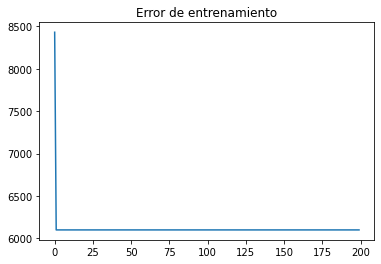

In [141]:
import matplotlib.pyplot as plt
plt.plot(errorVec)
plt.title("Error de entrenamiento")